In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
sys.path.append('../../CSR2D/')

# 3D CSR Potentials

In [3]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
#sigma_z = 40e-6
#sigma_x = 134e-6 
#rho = 1538.
#gamma = 58708.

sigma_z = 10e-6
sigma_x = 10e-6 
rho = 1.
gamma = 500.


beta = np.sqrt(1 - 1 / gamma ** 2)
beta2 = 1-1/gamma**2


# alpha

For convenience we will use the notatation

$\xi \rightarrow z$

$\chi \rightarrow x$

$\zeta \rightarrow y$

Then 

$z = \alpha - \frac{\beta}{2}\sqrt{x^2+y^2+4(1+x)\sin^2\alpha}$

In [5]:
from csr3d.core import alpha_exact, alpha, alpha_where_z_equals_zero

In [6]:
xmax = 1/gamma**2
xmin = -xmax
xptp = xmax-xmin

ymax = 1/gamma**2
ymin = -ymax
yptp = ymax-ymin

zmax = 1/gamma**2
zmin = -zmax
zptp = zmax-zmin

nx = 128
ny = 64
nz = 256

dx = xptp/(nx-1)
dy = yptp/(ny-1)
dz = zptp/(nz-1)

xvec = np.linspace(xmin, xmax, nx)
yvec = np.linspace(ymin, ymax, ny)
zvec = np.linspace(zmin, zmax, nz)

X, Y, Z = np.meshgrid( xvec, yvec, zvec, indexing='ij')

xmax, ymax, zmax

(4e-06, 4e-06, 4e-06)

In [7]:
# This will be slow
A0 = alpha_exact(X, Y, Z, beta)

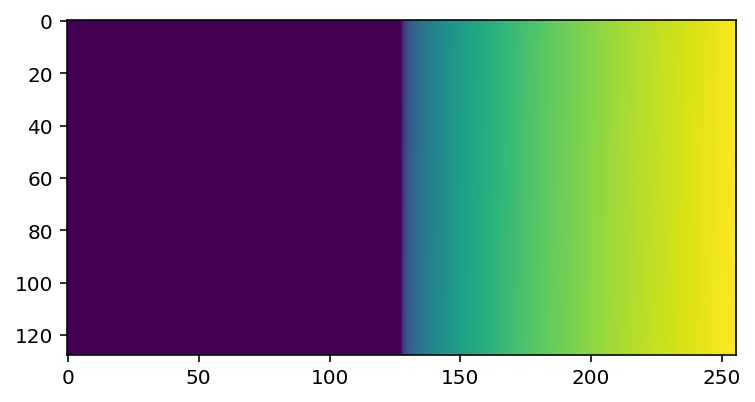

In [8]:
plt.imshow(A0[:,1,:])

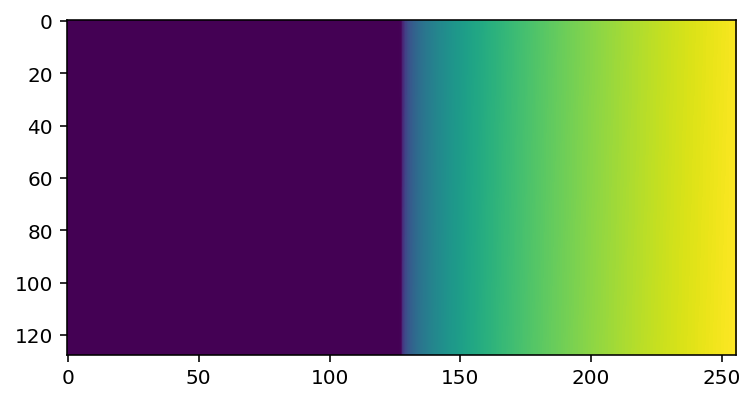

In [9]:
A1 = alpha(X, Y, Z, beta)
plt.imshow(A1[:,1,:])

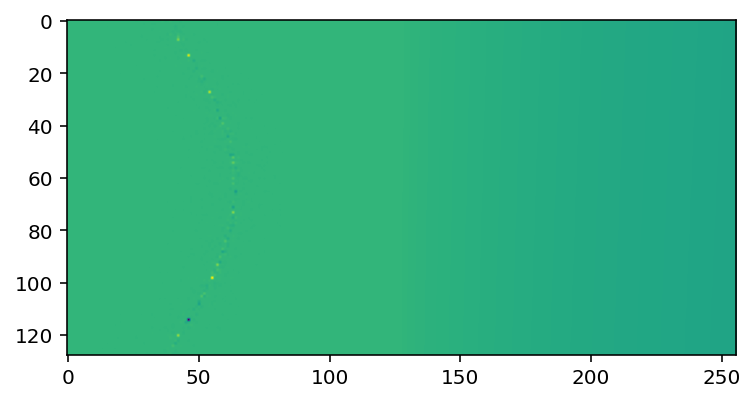

In [10]:
err = (A1-A0)/A0
np.abs(err).max()
plt.imshow(err[:,0,:])

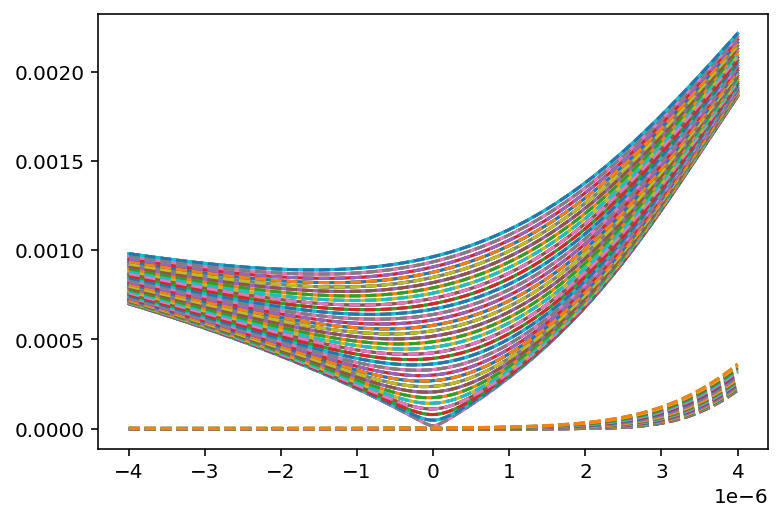

In [11]:
for y0 in yvec:
    a0 =  alpha_exact(xvec, y0, 0, beta2)
    a1 = alpha_where_z_equals_zero(xvec, y0, beta2)
    err = a0-a1
    plt.plot(xvec, a0)
    plt.plot(xvec, a1, linestyle='--')
    plt.plot(xvec, err*1e6, linestyle='--')

# psi_s

In [12]:
from csr3d.core import psi_s

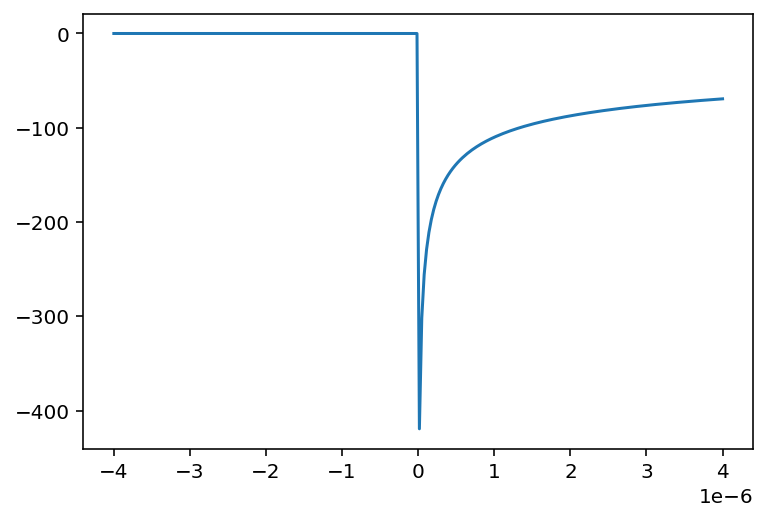

In [13]:
plt.plot(zvec, psi_s(0, 0, zvec, beta))

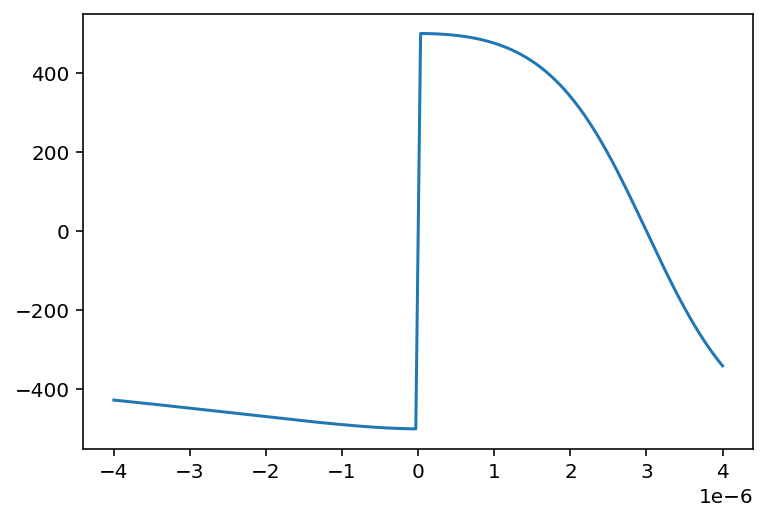

In [14]:
plt.plot(xvec, psi_s(xvec, 0, 0, beta))

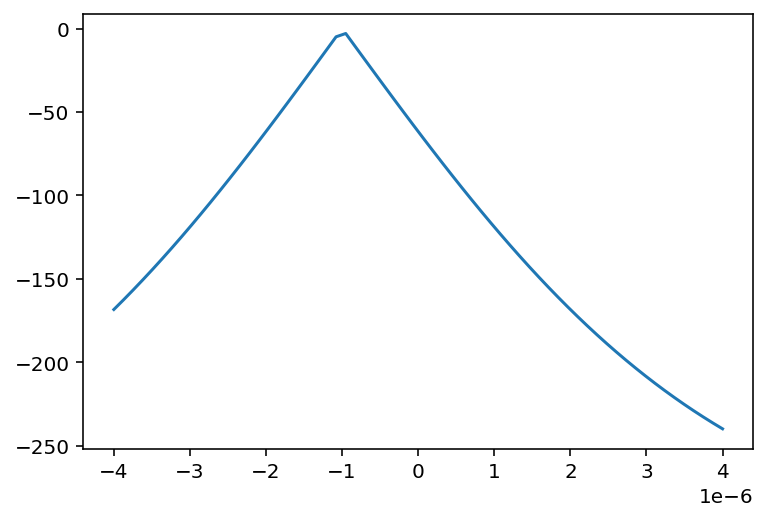

In [15]:
plt.plot(yvec, psi_s(0, yvec+1e-6, 0, beta))

In [16]:
psi_s(0,1e-6,1e-6, beta)

-110.04697293067511

# psi_s mesh

In [17]:
from csr3d.wake import green_meshes

In [18]:
%%time
G = green_meshes((nx, ny, nz), (dx, dy, dz), rho=rho, beta=beta, components=['s'])['psi_s_mesh']

CPU times: user 4.01 s, sys: 1.54 s, total: 5.55 s
Wall time: 5.63 s


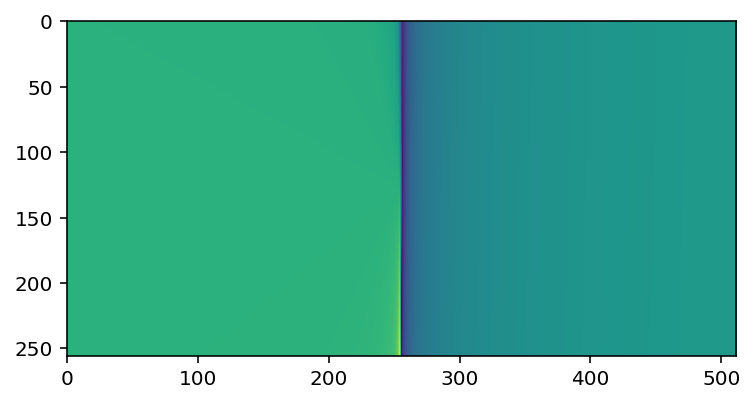

In [19]:
plt.imshow(G[:,16,:])

In [20]:
%%time
Gs = green_meshes((nx, ny, nz), (dx, dy, dz/100), rho=rho, beta=beta, components=['s'])['psi_s_mesh']

CPU times: user 3.91 s, sys: 1.44 s, total: 5.35 s
Wall time: 5.39 s


Text(0.5, 1.0, '$\\psi_s$')

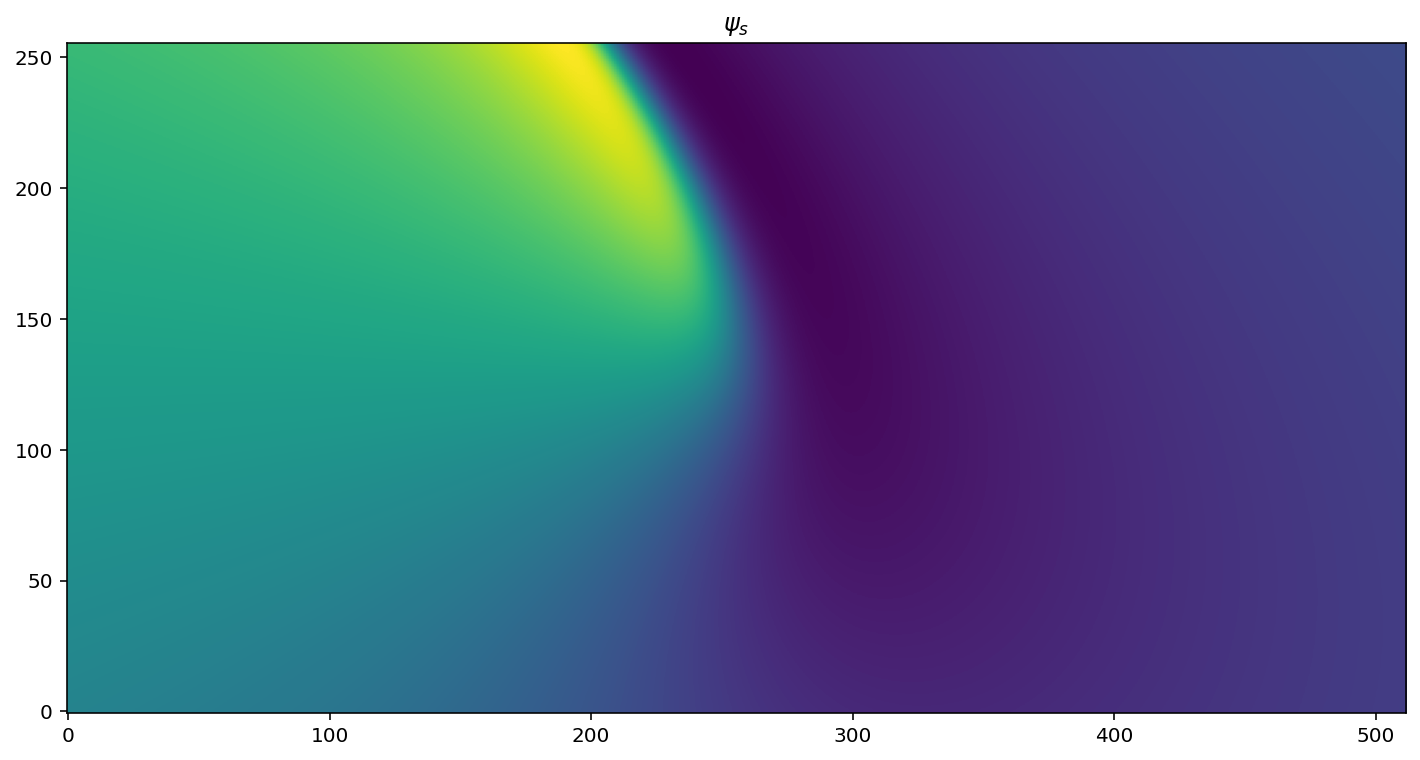

In [21]:
fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(Gs[:,ny//2,:], origin='lower', aspect='equal')
ax.set_title(r'$\psi_s$')

# psi_x

In [22]:
from csr3d.core import psi_x

# Compare with CSR2D at y=0
from csr2d.core2 import psi_x as psi_x2
from csr2d.core2 import alpha as alpha2

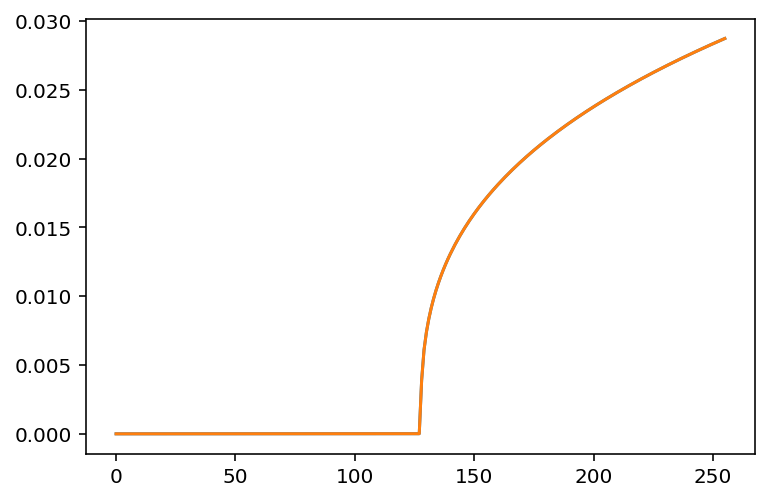

In [23]:
plt.plot(alpha2(zvec, 1e-6, beta2))
plt.plot(alpha(1e-6, 0, zvec, beta2))

In [24]:
psi_x(1e-6, 0, -10e-6, beta)

1.9998948121180655

In [25]:
psi_x2(-10e-6, 1e-6, beta)

1.999894812431525

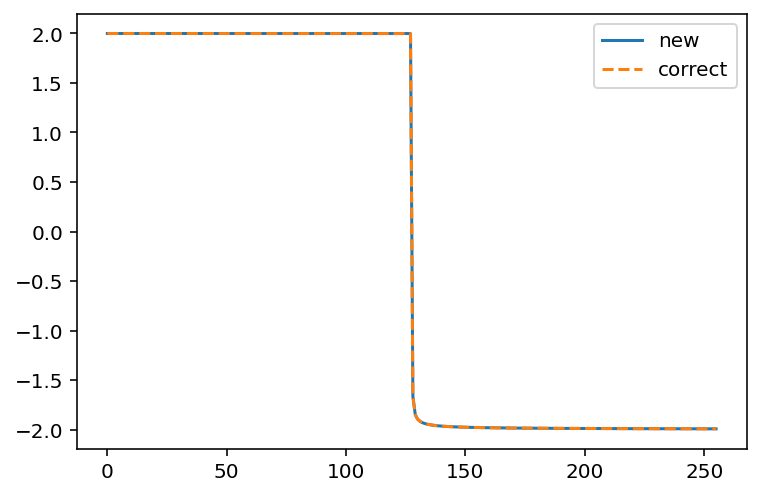

In [26]:

res = psi_x(1e-6, 0, zvec, beta)
res2 = psi_x2(zvec, 1e-6, beta)
plt.plot(res, label='new')
plt.plot(res2, label='correct', linestyle='--')
plt.legend()


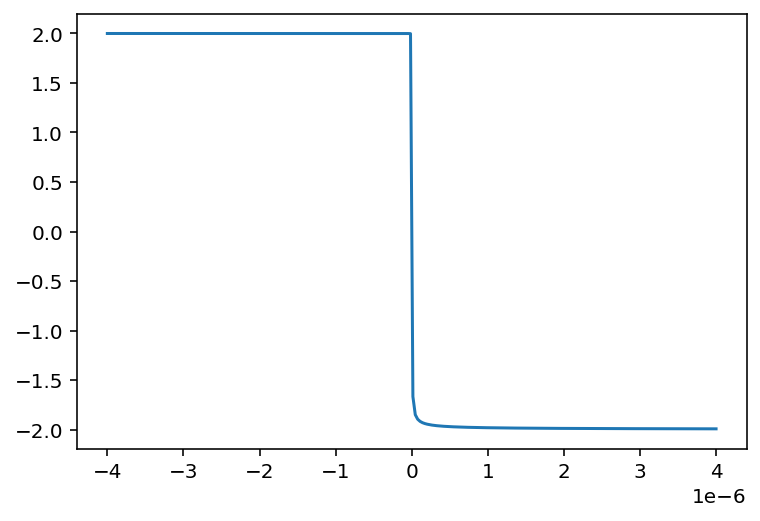

In [27]:

plt.plot(zvec,res)

In [28]:
xm, ym = np.meshgrid(xvec, yvec, indexing='ij')

R = psi_x(xm, ym, 1/(300*gamma**3), beta=beta)
R.shape

(128, 64)

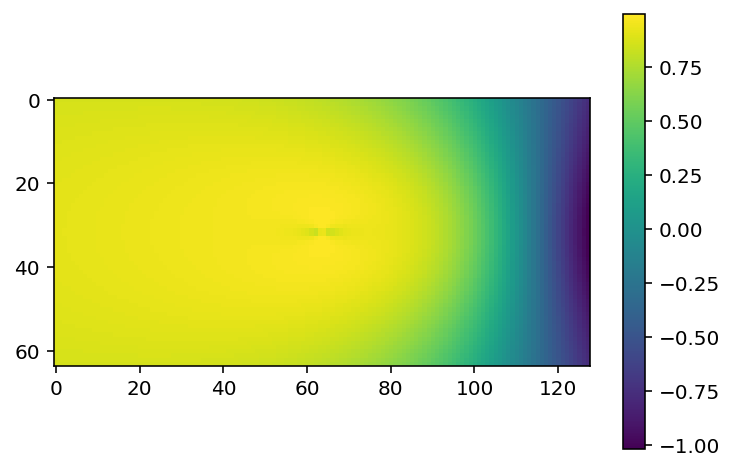

In [29]:
plt.imshow(R.T)
plt.colorbar()

In [30]:
%%time
Gx = green_meshes((nx, ny, nz), (dx, dy, dz/100), rho=rho, beta=beta, components=['x'])['psi_x_mesh']

CPU times: user 11.4 s, sys: 2.58 s, total: 14 s
Wall time: 14.4 s


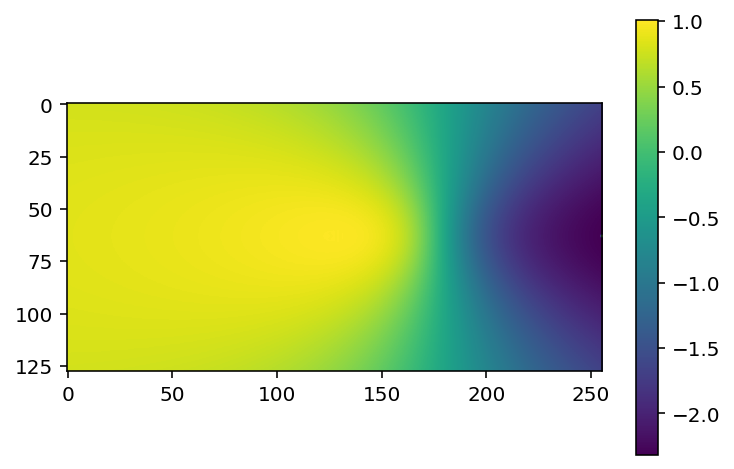

In [31]:
plt.imshow(Gx[:,:,nz -1].T)
plt.colorbar()

In [32]:
Gx[nx-1+1,ny-1,nz-1]

0.9828096596162368

# psi_y

In [33]:
from csr3d.core import psi_y

In [34]:
res = psi_y(1e-6, 1e-6,zvec, beta)

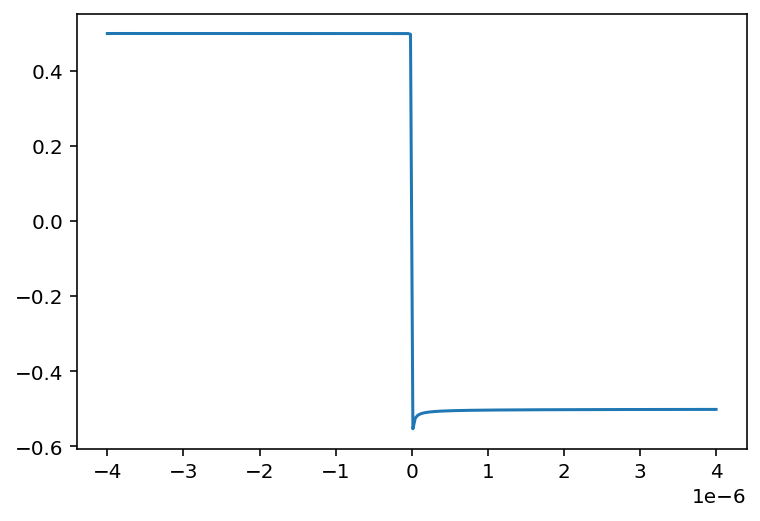

In [35]:
plt.plot(zvec, res)

In [36]:
xm, ym = np.meshgrid(xvec, yvec/10, indexing='ij')

In [37]:
R = psi_y(xm, ym, 1/(300*gamma**3), beta=beta)
R.shape, R.min(), R.max()

((128, 64), -0.26428394583333326, 0.26428394583333326)

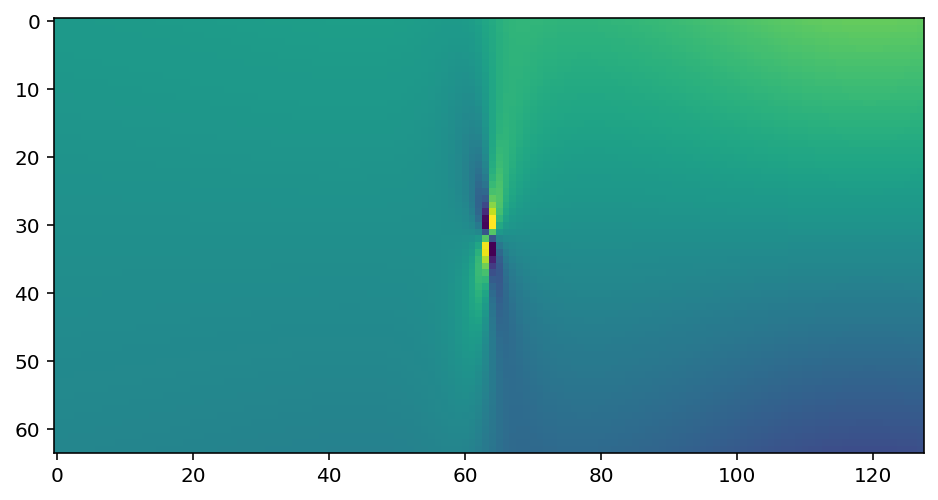

In [38]:
figx, ax = plt.subplots(figsize=(8,4))
ax.imshow(R.T)

# psi_phi, and others at the same time

In [39]:
from csr3d.core import psi_calc

In [40]:
xm, ym = np.meshgrid(xvec, yvec, indexing='ij')

In [44]:
res = psi_calc(xm, ym, 1/(300*gamma**3), beta=beta, components=['x', 'y', 's'])

In [45]:
R = res['psi_x']

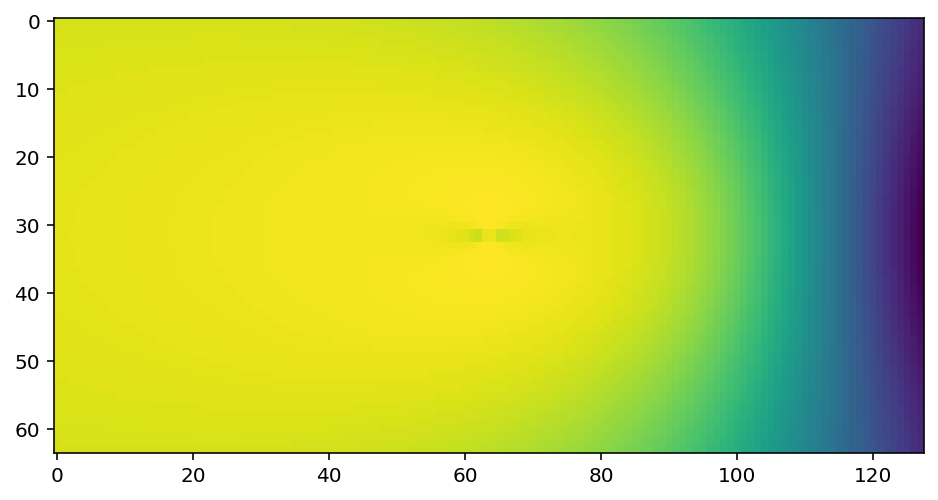

In [46]:
figx, ax = plt.subplots(figsize=(8,4))
ax.imshow(R.T)